In [1]:
import pandas as pd
from torchvision import datasets, transforms, utils
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import torch



Files already downloaded and verified


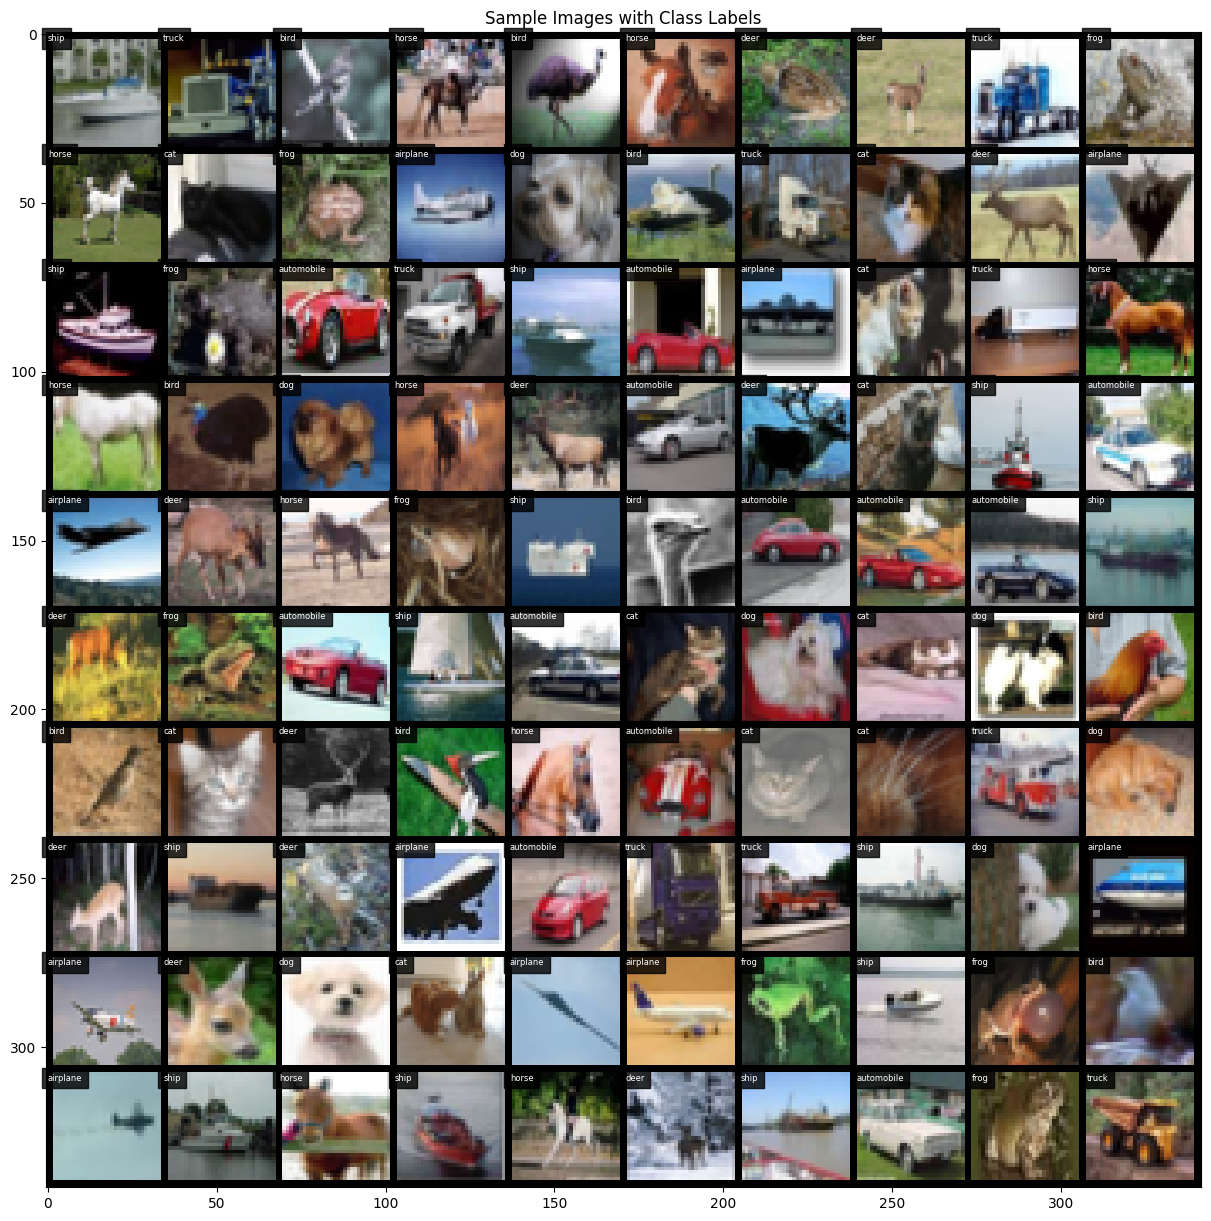

In [3]:
# Define the transformation
transform = transforms.Compose([transforms.ToTensor()])

# Load CIFAR-10 dataset
dataset = datasets.CIFAR10(
    root='data/',
    download=True,
    transform=transform
)

# Create a DataLoader to iterate through the dataset
dataloader = torch.utils.data.DataLoader(dataset, batch_size=1, shuffle=True)

# Function to show images in a grid with class labels
def imshow_grid(images, labels, class_names, title):
    fig, ax = plt.subplots(figsize=(15, 15))  # Set the figure size
    images = utils.make_grid(images, nrow=10)
    npimg = images.numpy()
    ax.imshow(np.transpose(npimg, (1, 2, 0)))
    
    # Add class labels
    for i in range(10):
        for j in range(10):
            ax.text(j * images.size(2) / 10, i * images.size(1) / 10, class_names[labels[i * 10 + j]],
                     ha='left', va='top', color='white', fontsize=6, bbox=dict(facecolor='black', alpha=0.8))
    
    ax.set_title(title)
    plt.show()

# Plot 100 images in a 10 by 10 grid with class labels
images_to_plot = []
labels_to_plot = []

for i, (images, labels) in enumerate(dataloader):
    images_to_plot.append(images)
    labels_to_plot.append(labels.item())

    if i == 99:  # Display 100 images
        break

class_names = dataset.classes
imshow_grid(torch.cat(images_to_plot, dim=0), labels_to_plot, class_names, title="Sample Images with Class Labels")

Files already downloaded and verified


IndexError: list index out of range

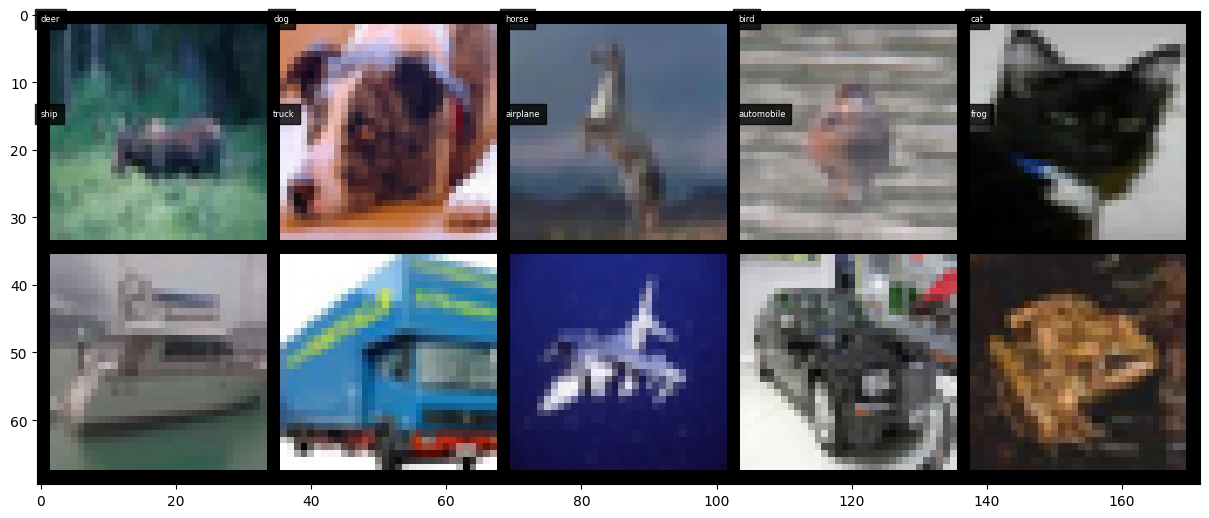

In [5]:
transform = transforms.Compose([transforms.ToTensor()])

# Load CIFAR-10 dataset
dataset = datasets.CIFAR10(
    root='data/',
    download=True,
    transform=transform
)

# Create a DataLoader to iterate through the dataset
dataloader = torch.utils.data.DataLoader(dataset, batch_size=1, shuffle=True)

# Function to show images in a grid with class labels
def imshow_grid(images, labels, class_names, title):
    fig, ax = plt.subplots(figsize=(15, 15))  # Set the figure size
    images = utils.make_grid(images, nrow=5)
    npimg = images.numpy()
    ax.imshow(np.transpose(npimg, (1, 2, 0)))
    
    # Add class labels
    for i in range(5):
        for j in range(5):
            ax.text(j * images.size(2) / 5, i * images.size(1) / 5, class_names[labels[i * 5 + j]],
                     ha='left', va='top', color='white', fontsize=6, bbox=dict(facecolor='black', alpha=0.8))
    
    ax.set_title(title)
    plt.show()

# Collect at least one image from each class
class_indices = {class_name: None for class_name in dataset.classes}
images_to_plot = []
labels_to_plot = []

for i, (images, labels) in enumerate(dataloader):
    class_name = dataset.classes[labels.item()]

    if class_indices[class_name] is None:
        images_to_plot.append(images)
        labels_to_plot.append(labels.item())
        class_indices[class_name] = len(images_to_plot) - 1

    if all(index is not None for index in class_indices.values()):
        break

# Collect additional images to complete the 5 by 5 grid
for i, (images, labels) in enumerate(dataloader):
    if len(images_to_plot) == 25:
        break

    if labels.item() not in labels_to_plot:
        images_to_plot.append(images)
        labels_to_plot.append(labels.item())

class_names = dataset.classes
imshow_grid(torch.cat(images_to_plot, dim=0), labels_to_plot, class_names, title="Sample Images with Class Labels")

Files already downloaded and verified


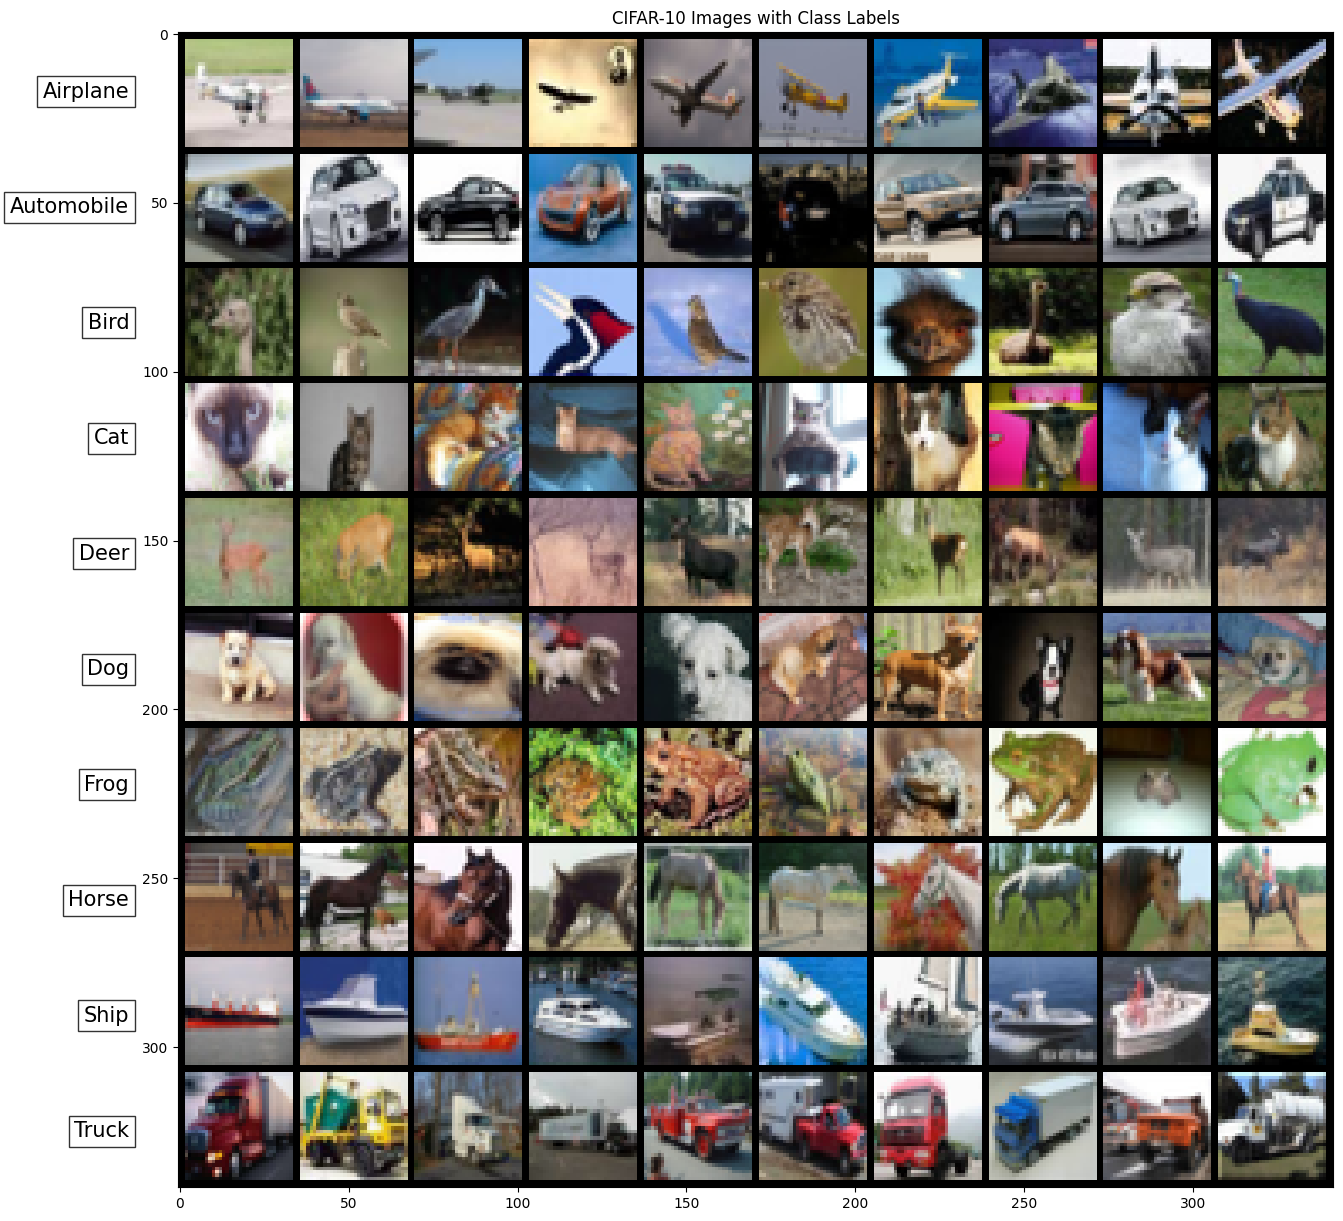

In [25]:
transform = transforms.Compose([transforms.ToTensor()])

# Load CIFAR-10 dataset
dataset = datasets.CIFAR10(
    root='data/',
    download=True,
    transform=transform
)

# Create a DataLoader to iterate through the dataset
dataloader = torch.utils.data.DataLoader(dataset, batch_size=1, shuffle=True)

# Function to show images in a grid with class labels
def imshow_grid(images, class_names, title):
    fig, ax = plt.subplots(figsize=(15, 15))  # Set the figure size
    images = utils.make_grid(images, nrow=10)
    npimg = images.numpy()
    ax.imshow(np.transpose(npimg, (1, 2, 0)))
    
    # Add class labels to the left of each row
    for i, class_name in enumerate(class_names):
        ax.text(-15, i * images.size(1) / 10 + images.size(1) / 20, class_name,
                ha='right', va='center', color='black', fontsize=15, bbox=dict(facecolor='white', alpha=0.8))
    
    ax.set_title(title)
    plt.show()

# Collect 10 images per class for each row
class_images = {class_name: [] for class_name in dataset.classes}

for i, (images, labels) in enumerate(dataloader):
    class_name = dataset.classes[labels.item()]

    if len(class_images[class_name]) < 10:
        class_images[class_name].append(images)

    if all(len(images_list) == 10 for images_list in class_images.values()):
        break

# Combine the collected images to form a 10 by 10 grid
images_to_plot = []
class_names = list(class_images.keys())

# for i in range(10):
#     images_to_plot.extend(class_images[class_name][i] for class_name in class_names)

for class_name in class_names:
    images_to_plot.extend(class_images[class_name][i] for i in range(10))

labels_to_plot = [dataset.class_to_idx[class_name] for class_name in class_names for _ in range(10)]

class_names = [class_name.capitalize() for class_name in class_names]
imshow_grid(torch.cat(images_to_plot, dim=0), class_names, title="CIFAR-10 Images with Class Labels")
